In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from scipy.stats import zscore


In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv")
print('Original Data')
display(data.head())


Original Data


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:

data.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [ ]:

# Handle missing values

imputer = SimpleImputer(strategy = 'mean')
data['age'] = imputer.fit_transform(data[['age']])
print(data.isnull().sum())


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [ ]:


data = pd.get_dummies(data, columns = ['embarked'])
display(data.head())


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,False,True
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,True,False,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,False,True


In [ ]:

# Feature Scaling

scaler_std = StandardScaler()
data[["age_scaled", "fare_scaled"]] = scaler_std.fit_transform(data[["age", "fare"]])
display(data.head())

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,age_scaled,fare_scaled
0,0,3,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,False,True,-0.592481,-0.502445
1,1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,True,False,False,0.638789,0.786845
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,False,False,True,-0.284663,-0.488854
3,1,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,False,False,True,0.407926,0.420730
4,0,3,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,False,True,0.407926,-0.486337


In [ ]:


scaler_minmax = MinMaxScaler()
data[["age_minmax", "fare_minmax"]] = scaler_minmax.fit_transform(data[["age", "fare"]])
display(data.head())

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,age_scaled,fare_scaled,age_minmax,fare_minmax
0,0,3,male,22.0,1,0,7.2500,Third,man,True,...,Southampton,no,False,False,False,True,-0.592481,-0.502445,0.271174,0.014151
1,1,1,female,38.0,1,0,71.2833,First,woman,False,...,Cherbourg,yes,False,True,False,False,0.638789,0.786845,0.472229,0.139136
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,...,Southampton,yes,True,False,False,True,-0.284663,-0.488854,0.321438,0.015469
3,1,1,female,35.0,1,0,53.1000,First,woman,False,...,Southampton,yes,False,False,False,True,0.407926,0.420730,0.434531,0.103644
4,0,3,male,35.0,0,0,8.0500,Third,man,True,...,Southampton,no,True,False,False,True,0.407926,-0.486337,0.434531,0.015713


In [ ]:
data.drop_duplicates(inplace=True)
display(data)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,...,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,age_scaled,fare_scaled,age_minmax,fare_minmax
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,...,Southampton,no,False,False,False,True,-0.592481,-0.502445,0.271174,0.014151
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,...,Cherbourg,yes,False,True,False,False,0.638789,0.786845,0.472229,0.139136
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,...,Southampton,yes,True,False,False,True,-0.284663,-0.488854,0.321438,0.015469
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,...,Southampton,yes,False,False,False,True,0.407926,0.420730,0.434531,0.103644
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,...,Southampton,no,True,False,False,True,0.407926,-0.486337,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Third,woman,False,...,Queenstown,no,False,False,True,False,0.715743,-0.061999,0.484795,0.056848
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,...,Southampton,yes,True,False,False,True,-0.823344,-0.044381,0.233476,0.058556
888,0,3,female,29.699118,1,2,23.4500,Third,woman,False,...,Southampton,no,False,False,False,True,0.000000,-0.176263,0.367921,0.045771
889,1,1,male,26.000000,0,0,30.0000,First,man,True,...,Cherbourg,yes,True,True,False,False,-0.284663,-0.044381,0.321438,0.058556


In [ ]:
data.drop(['deck','embark_town','alive'],axis = 1, inplace =True)
display(data)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone,embarked_C,embarked_Q,embarked_S,age_scaled,fare_scaled,age_minmax,fare_minmax
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,False,False,False,True,-0.592481,-0.502445,0.271174,0.014151
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,False,True,False,False,0.638789,0.786845,0.472229,0.139136
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,True,False,False,True,-0.284663,-0.488854,0.321438,0.015469
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,False,False,False,True,0.407926,0.420730,0.434531,0.103644
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,True,False,False,True,0.407926,-0.486337,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Third,woman,False,False,False,True,False,0.715743,-0.061999,0.484795,0.056848
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,True,False,False,True,-0.823344,-0.044381,0.233476,0.058556
888,0,3,female,29.699118,1,2,23.4500,Third,woman,False,False,False,False,True,0.000000,-0.176263,0.367921,0.045771
889,1,1,male,26.000000,0,0,30.0000,First,man,True,True,True,False,False,-0.284663,-0.044381,0.321438,0.058556


In [ ]:
data = data[(np.abs(zscore(data[['age','fare']])) < 3).all(axis = 1)]
display(data)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone,embarked_C,embarked_Q,embarked_S,age_scaled,fare_scaled,age_minmax,fare_minmax
0,0,3,male,22.000000,1,0,7.2500,Third,man,True,False,False,False,True,-0.592481,-0.502445,0.271174,0.014151
1,1,1,female,38.000000,1,0,71.2833,First,woman,False,False,True,False,False,0.638789,0.786845,0.472229,0.139136
2,1,3,female,26.000000,0,0,7.9250,Third,woman,False,True,False,False,True,-0.284663,-0.488854,0.321438,0.015469
3,1,1,female,35.000000,1,0,53.1000,First,woman,False,False,False,False,True,0.407926,0.420730,0.434531,0.103644
4,0,3,male,35.000000,0,0,8.0500,Third,man,True,True,False,False,True,0.407926,-0.486337,0.434531,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Third,woman,False,False,False,True,False,0.715743,-0.061999,0.484795,0.056848
887,1,1,female,19.000000,0,0,30.0000,First,woman,False,True,False,False,True,-0.823344,-0.044381,0.233476,0.058556
888,0,3,female,29.699118,1,2,23.4500,Third,woman,False,False,False,False,True,0.000000,-0.176263,0.367921,0.045771
889,1,1,male,26.000000,0,0,30.0000,First,man,True,True,True,False,False,-0.284663,-0.044381,0.321438,0.058556


In [ ]:
plt.figure(figsize = (12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

Text(0.5, 1.0, 'age distribution After imputation')

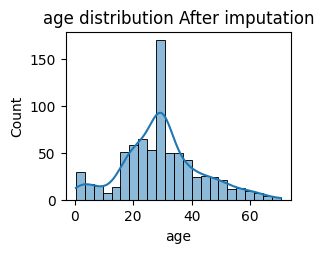

In [ ]:
plt.subplot(2,2,1)
sns.histplot(data['age'],kde=True)
plt.title('age distribution After imputation')


Text(0.5, 1.0, 'fare distribution After imputation')

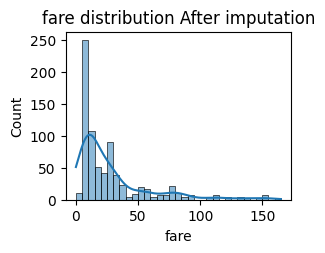

In [ ]:
plt.subplot(2,2,2)
sns.histplot(data['fare'],kde=True)
plt.title('fare distribution After imputation')

Text(0.5, 1.0, 'age distribution After imputation')

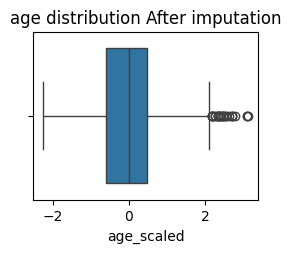

In [ ]:
plt.subplot(2,2,3)
sns.boxplot(x = data['age_scaled'])
plt.title('age Standard Scaled')

Text(0.5, 1.0, 'fare minmax scaled')

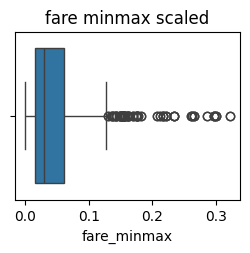

In [ ]:
plt.subplot(2,2,4)
sns.boxplot(x = data['fare_minmax'])
plt.title('fare minmax scaled')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:
print("Cleaned Dataset:")
display(data.head())

Cleaned Dataset:


,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,alone,embarked_C,embarked_Q,embarked_S,age_scaled,fare_scaled,age_minmax,fare_minmax
0,0,3,male,22.0,1,0,7.2500,Third,man,True,False,False,False,True,-0.592481,-0.502445,0.271174,0.014151
1,1,1,female,38.0,1,0,71.2833,First,woman,False,False,True,False,False,0.638789,0.786845,0.472229,0.139136
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,True,False,False,True,-0.284663,-0.488854,0.321438,0.015469
3,1,1,female,35.0,1,0,53.1000,First,woman,False,False,False,False,True,0.407926,0.420730,0.434531,0.103644
4,0,3,male,35.0,0,0,8.0500,Third,man,True,True,False,False,True,0.407926,-0.486337,0.434531,0.015713
